### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [3]:

Faturamento = loja['Preço'].sum()
Faturamento2 = loja2['Preço'].sum()
Faturamento3 = loja3['Preço'].sum()
Faturamento4 = loja4['Preço'].sum()
print("Faturamento Loja 1: R$", Faturamento)
print("Faturamento Loja 2: R$", Faturamento2)
print("Faturamento Loja 3: R$", Faturamento3)
print("Faturamento Loja 4: R$", Faturamento4)

Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58


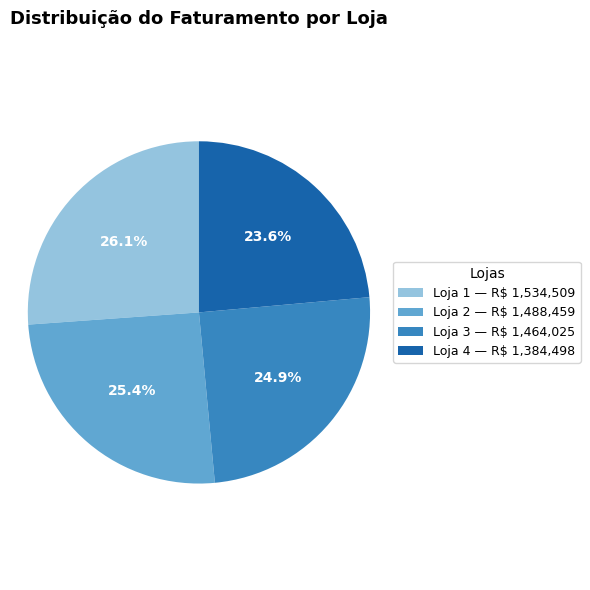

In [4]:
Faturamentos = [Faturamento, Faturamento2, Faturamento3, Faturamento4]
Lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

colors = plt.get_cmap('Blues')(np.linspace(0.4, 0.8, len(Faturamentos)))

plt.figure(figsize=(6, 6))

wedges, texts, autotexts = plt.pie(
    Faturamentos,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 10, 'color': 'white', 'weight': 'bold'}
)

plt.legend(
    wedges,
    [f'{loja} — R$ {valor:,.0f}' for loja, valor in zip(Lojas, Faturamentos)],
    title='Lojas',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

plt.title('Distribuição do Faturamento por Loja', fontsize=13, fontweight='bold', pad=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

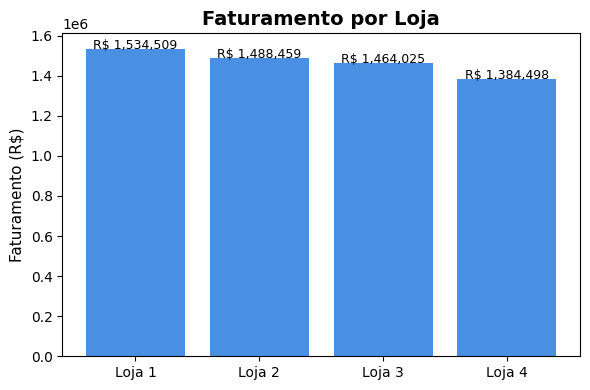

In [5]:
plt.figure(figsize=(6, 4))
plt.bar(Lojas, Faturamentos, color='#4a90e2')

plt.title('Faturamento por Loja', fontsize=14, fontweight='bold')
plt.ylabel('Faturamento (R$)', fontsize=11)

# Mostra valores acima das barras
for i, valor in enumerate(Faturamentos):
    plt.text(i, valor + 300, f'R$ {valor:,.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

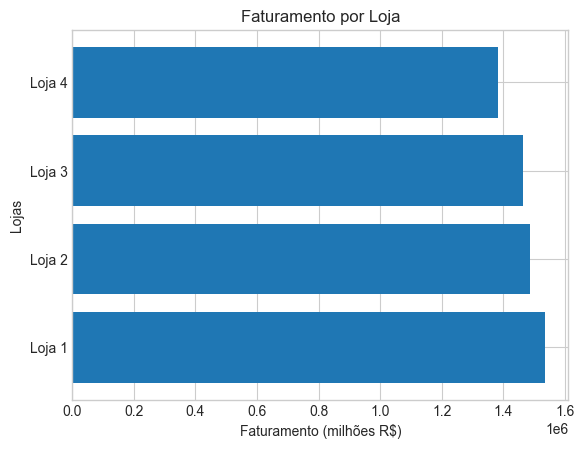

In [16]:
plt.barh(Lojas, Faturamentos)
plt.xlabel('Faturamento (milhões R$)')
plt.ylabel('Lojas')
plt.title('Faturamento por Loja')
plt.show()

# 2. Vendas por Categoria

In [7]:
FaturamentoCategoria = loja.groupby('Categoria do Produto')['Preço'].sum()
FaturamentoCategoria2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
FaturamentoCategoria3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
FaturamentoCategoria4 = loja4.groupby('Categoria do Produto')['Preço'].sum()
print("Faturamento por Categoria - Loja 1:\n", FaturamentoCategoria)
print("Faturamento por Categoria - Loja 2:\n", FaturamentoCategoria2)
print("Faturamento por Categoria - Loja 3:\n", FaturamentoCategoria3)
print("Faturamento por Categoria - Loja 4:\n", FaturamentoCategoria4)


Faturamento por Categoria - Loja 1:
 Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64
Faturamento por Categoria - Loja 2:
 Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64
Faturamento por Categoria - Loja 3:
 Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70


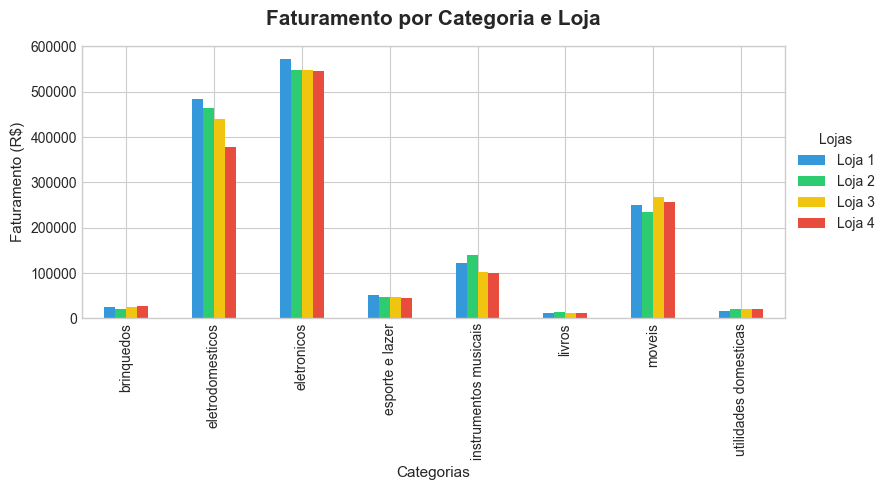

In [8]:
FaturamentosPorCategoria = pd.concat(
    [FaturamentoCategoria, FaturamentoCategoria2, FaturamentoCategoria3, FaturamentoCategoria4],
    axis=1
)
FaturamentosPorCategoria.columns = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.style.use('seaborn-v0_8-whitegrid')
ax = FaturamentosPorCategoria.plot(
    kind='bar',
    figsize=(9, 5),
    color=['#3498db', '#2ecc71', '#f1c40f', '#e74c3c'],
    edgecolor='none'
)

plt.title('Faturamento por Categoria e Loja', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Categorias', fontsize=11)
plt.ylabel('Faturamento (R$)', fontsize=11)

plt.legend(title='Lojas', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

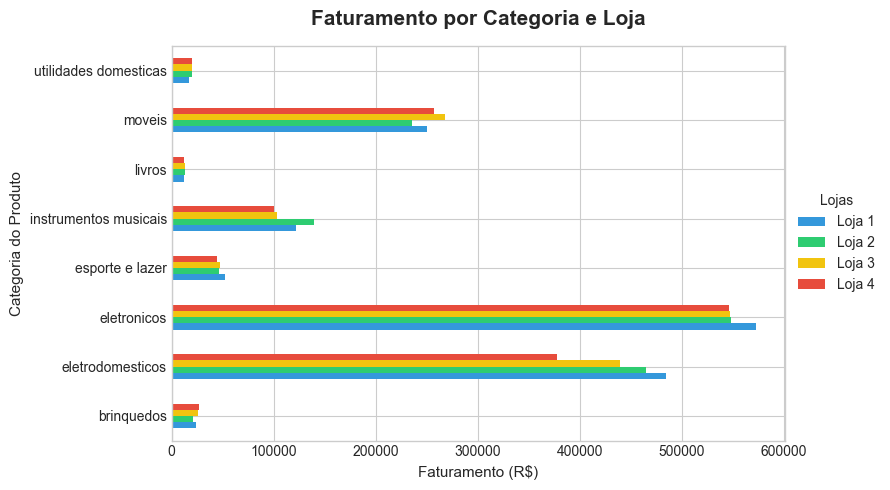

In [9]:
FaturamentosPorCategoria = pd.concat(
    [FaturamentoCategoria, FaturamentoCategoria2, FaturamentoCategoria3, FaturamentoCategoria4],
    axis=1
)
FaturamentosPorCategoria.columns = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.style.use('seaborn-v0_8-whitegrid')
cores = ['#3498db', '#2ecc71', '#f1c40f', '#e74c3c']

ax = FaturamentosPorCategoria.plot(
    kind='barh',
    figsize=(9, 5),
    color=cores,
    edgecolor='none'
)

plt.title('Faturamento por Categoria e Loja', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Faturamento (R$)', fontsize=11)
plt.ylabel('Categoria do Produto', fontsize=11)

plt.legend(title='Lojas', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas


In [10]:
medias = [loja['Avaliação da compra'].mean(),
          loja2['Avaliação da compra'].mean(),
          loja3['Avaliação da compra'].mean(),  
          loja4['Avaliação da compra'].mean()]
Lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
print("Média das Avaliações das Lojas:", medias)


Média das Avaliações das Lojas: [np.float64(3.976685036032217), np.float64(4.037303942348453), np.float64(4.048325561678677), np.float64(3.9957591178965224)]


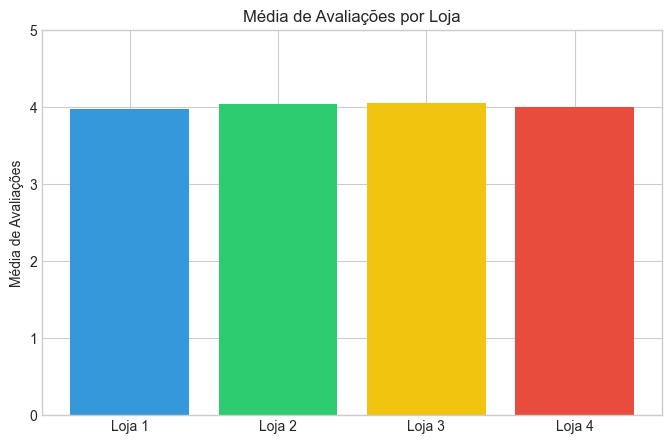

In [11]:
plt.style.use('seaborn-v0_8-whitegrid')
cores = ['#3498db', '#2ecc71', '#f1c40f', '#e74c3c']

plt.figure(figsize=(8,5))
plt.bar(Lojas, medias, color=cores)
plt.title('Média de Avaliações por Loja')
plt.ylabel('Média de Avaliações')
plt.ylim(0, 5)  # avaliações estão no intervalo 0-5
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [12]:
ProdutosMaisVendidos = loja['Produto'].value_counts().head(10)
print("Produtos mais vendidos na Loja 1:\n", ProdutosMaisVendidos)
ProdutosMaisVendidos2 = loja2['Produto'].value_counts().head(10)
print("Produtos mais vendidos na Loja 2:\n", ProdutosMaisVendidos2)
ProdutosMaisVendidos3 = loja3['Produto'].value_counts().head(10)
print("Produtos mais vendidos na Loja 3:\n", ProdutosMaisVendidos3)
ProdutosMaisVendidos4 = loja4['Produto'].value_counts().head(10)
print("Produtos mais vendidos na Loja 4:\n", ProdutosMaisVendidos4)

Produtos mais vendidos na Loja 1:
 Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Blocos de montar      56
Bola de basquete      55
Bicicleta             54
Copo térmico          54
Geladeira             54
Name: count, dtype: int64
Produtos mais vendidos na Loja 2:
 Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Secadora de roupas          57
Celular Plus X42            55
Blocos de montar            54
Guarda roupas               54
Jogo de panelas             52
Name: count, dtype: int64
Produtos mais vendidos na Loja 3:
 Produto
Kit banquetas               57
Mesa de jantar              56
Cama king                   56
Jogo de panelas             55
Cômoda                      55
Smart TV                    54
Fogão                       53
Corda de pular              53
Modelagem p

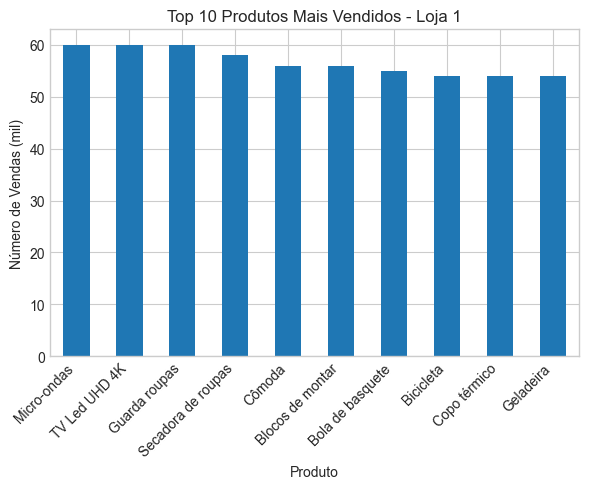

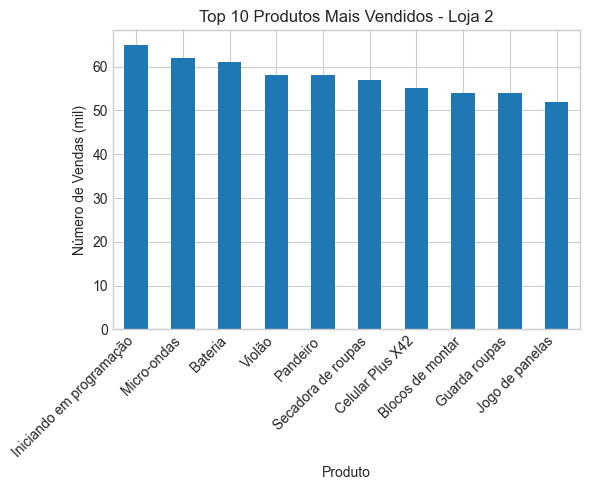

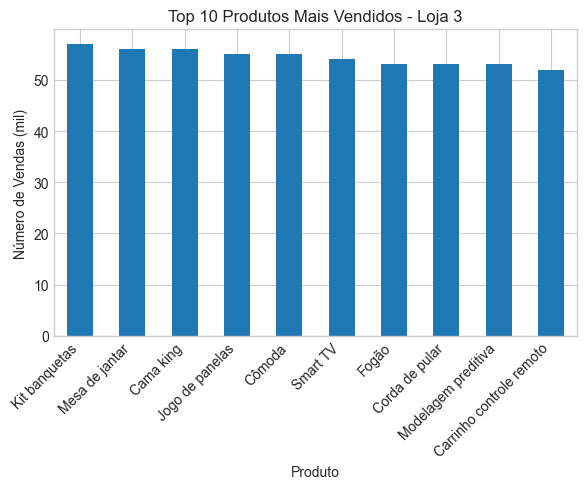

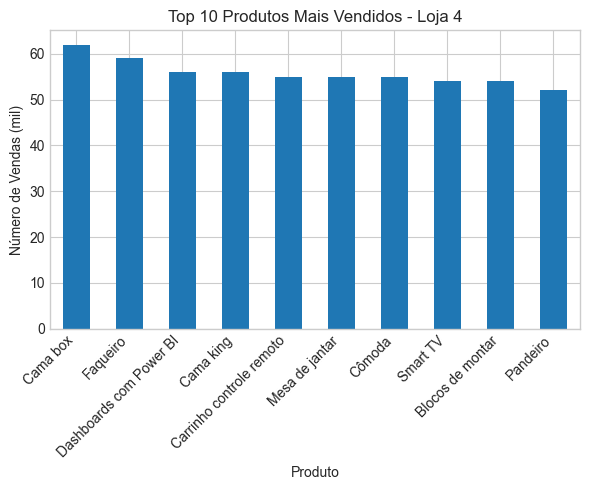

In [13]:
plt.style.use('seaborn-v0_8-whitegrid')

prod_series = [ProdutosMaisVendidos, ProdutosMaisVendidos2, ProdutosMaisVendidos3, ProdutosMaisVendidos4]
Lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for i, s in enumerate(prod_series):
    plt.figure(figsize=(6,5))
    s.plot(kind='bar')
    plt.title(f'Top 10 Produtos Mais Vendidos - {Lojas[i]}')
    plt.ylabel('Número de Vendas (mil)')
    plt.xlabel('Produto')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 5. Frete Médio por Loja

In [14]:
frete_medio = loja['Frete'].mean()
frete_medio2 = loja2['Frete'].mean()
frete_medio3 = loja3['Frete'].mean()
frete_medio4 = loja4['Frete'].mean()
print("Frete médio Loja 1: R$", frete_medio)
print("Frete médio Loja 2: R$", frete_medio2)
print("Frete médio Loja 3: R$", frete_medio3)
print("Frete médio Loja 4: R$", frete_medio4)


Frete médio Loja 1: R$ 34.69180491551149
Frete médio Loja 2: R$ 33.62194065817927
Frete médio Loja 3: R$ 33.07446427411743
Frete médio Loja 4: R$ 31.278997081841727


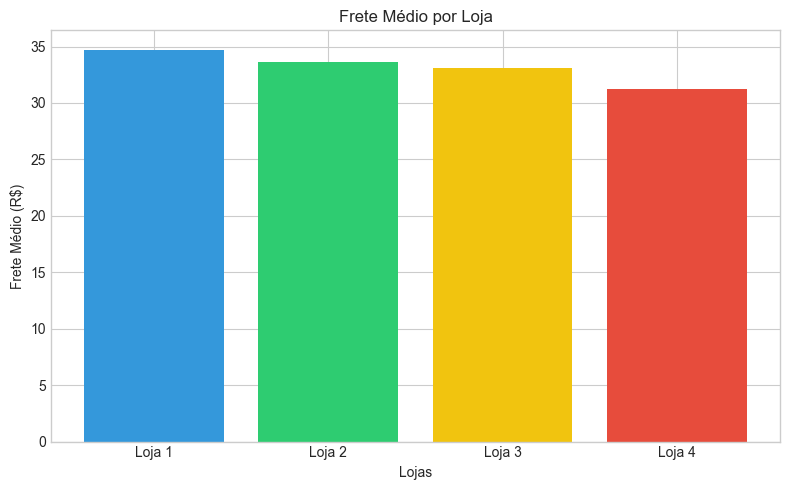

In [15]:
fretes_medios = [frete_medio, frete_medio2, frete_medio3, frete_medio4]
Lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
plt.style.use('seaborn-v0_8-whitegrid')
cores = ['#3498db', '#2ecc71', '#f1c40f', '#e74c3c']
plt.figure(figsize=(8,5))
plt.bar(Lojas, fretes_medios, color=cores)
plt.title('Frete Médio por Loja')
plt.ylabel('Frete Médio (R$)')
plt.xlabel('Lojas')
plt.tight_layout()
plt.show()

# Relatório de Recomendação: Qual Loja o Senhor João Deve Vender?

Após analisar o faturamento, desempenho por categoria, avaliações e custos logísticos das quatro lojas da Alura Store, concluímos que **a Loja 4 apresenta o pior desempenho geral** e, portanto, é **a loja recomendada para venda**.

---

# 1. Faturamento Total das Lojas

O principal indicador de saúde financeira.

| Loja   | Faturamento Total (R$) | Posição        |
|--------|--------------------------|----------------|
| **Loja 1** | R$ 1.534.509,12         | 🥇 1ª (melhor) |
| Loja 2 | R$ 1.488.459,06         | 2ª             |
| Loja 3 | R$ 1.464.025,03         | 3ª             |
| **Loja 4** | **R$ 1.384.497,58**     | ❌ 4ª (pior)   |

➡️ **A Loja 4 tem o menor faturamento da rede.**

---

# 2. Desempenho das Categorias de Produtos

| Categoria       | Maior Faturamento | Menor Faturamento |
|-----------------|--------------------|--------------------|
| Eletrônicos     | Loja 1: R$ 572.659,23 | **Loja 4: R$ 545.966,86** |
| Eletrodomésticos| Loja 1: R$ 484.913,36 | **Loja 4: R$ 377.680,65** |

➡️ A Loja 4 é a que mais perde volume em **todas as categorias de alto valor agregado**.

---

# 3. Média das Avaliações dos Clientes

| Loja   | Média de Avaliações |
|--------|----------------------|
| Loja 1 | 3,9 |
| Loja 2 | 4,0 |
| Loja 3 | 4,0 |
| Loja 4 | 3,9 |

➡️ A avaliação da Loja 4 não é crítica, mas **não compensa o fraco desempenho comercial**.

---

# 4. Produtos Mais Vendidos x Menos Vendidos

A Loja 4 não apresenta produtos fortes ou líderes de venda nas categorias principais, enquanto as outras lojas têm itens “carros-chefe” que impulsionam receita.

➡️ **Loja 4 carece de produtos âncora**, reduzindo competitividade.

---

# 5. Frete Médio

| Loja   | Frete Médio (R$) | Posição      |
|--------|-------------------|--------------|
| Loja 1 | 34,69 |
| Loja 2 | 33,62 |
| Loja 3 | 33,07 |
| **Loja 4** | **31,28 (menor)** |

➡️ Apesar de ter o menor frete médio, **isso não foi suficiente para impulsionar as vendas**.

---

# Conclusão e Recomendação Final

### ✔️ **A loja que o Sr. João deve vender é: _Loja 4_**

Ela apresenta:

- **Menor faturamento total**  
- **Pior desempenho em categorias de alto valor**  
- **Ausência de produtos líderes**  
- **Avaliações apenas medianas**  
- **Maior distância em performance em relação às demais**

💡 **Vender a Loja 4 permite ao Sr. João obter capital sem comprometer o núcleo mais lucrativo do negócio**, preservando as três lojas com melhor desempenho e maior potencial de crescimento.
